# <b> Sistem Rekomendasi Musik menggunakan TF-IDF dan Cosine Similarity

###  - Created by: Aziz F. Fauzi

## Import Library

In [1]:
import numpy as np
import pandas as pd
from typing import List, Dict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

## Data Understanding

In [2]:
df = pd.read_csv('dataset/songdata.csv')
df.sample(10)

,artist,song,link,text
41574,Leonard Cohen,The Gypsy's Wife,/l/leonard+cohen/gypsys+wife_20211100.html,"And where, where, where is my Gypsy wife tonig..."
27247,Cheap Trick,That 70's Song,/c/cheap+trick/that+70s+song_20806687.html,Hangin' out \nDown the street \nThe same old...
33672,George Jones,Barbara Joy,/g/george+jones/barbara+joy_20808726.html,Will you be there in the courtyard for the joy...
17070,Randy Travis,Runaway Train,/r/randy+travis/runaway+train_20309009.html,Baby our love is our love is like a runaway tr...
14088,Nicki Minaj,Still I Rise,/n/nicki+minaj/still+i+rise_20854467.html,[Verse 1:] \nYea yea uh huh \nShe said fuck ...
39634,Keith Urban,You're Not My God,/k/keith+urban/youre+not+my+god_10156450.html,"It's just a piece of paper, \nIt says, ""In Go..."
3262,Coldplay,Ghost Story,/c/coldplay/ghost+story_21083666.html,Maybe I'm just a ghost \nDisappear when anybo...
24423,Avril Lavigne,Push,/a/avril+lavigne/push_20901096.html,Been seein' too much of you lately \nAnd you'...
52165,Steely Dan,King Of The World,/s/steely+dan/king+of+the+world_20130095.html,Hello one and all \nWas it you I used to know...
21284,Westlife,Don't Let Me Go,/w/westlife/dont+let+me+go_20145965.html,So much to say \nBut where do I start \nWoul...


In [3]:
# eda
print(df.shape)

(57650, 4)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [5]:
# berapa banyak artist yang ada
print(df['artist'].value_counts().unique().sum())

17566


artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


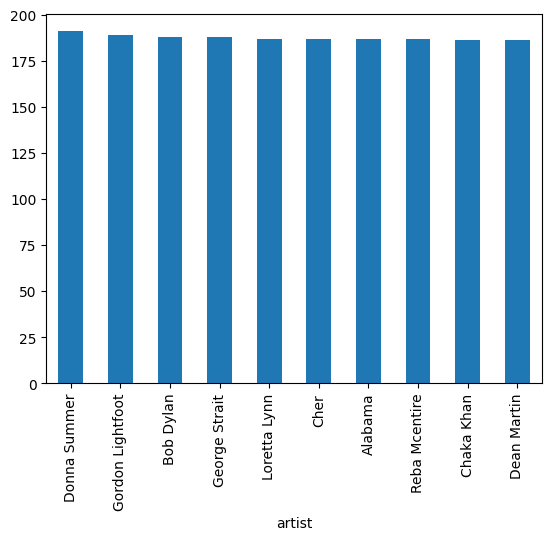

In [6]:
# visualisasi artis dengan lagu terbanyak (top 10)
print(df['artist'].value_counts().head(10))
df['artist'].value_counts().head(10).plot(kind='bar')
plt.show()


In [7]:
# jumlah kata dalam lirik
jumlah_kata = df['text'].apply(lambda x: len(str(x).split()))
jumlah_kata.describe()

count    57650.000000
mean       219.486262
std        108.814619
min         37.000000
25%        145.000000
50%        196.000000
75%        264.000000
max        827.000000
Name: text, dtype: float64

In [8]:
# ada berapa lagu justin bieber
print(df[df['artist'] == 'Justin Bieber'].shape)

(131, 4)


## Data Preparation

In [9]:
df = df.sample(n=20000, random_state=42).drop('link', axis=1).reset_index(drop=True)

In [10]:
# hapus \n dalam lirik
df['text'] = df['text'].str.replace(r'\n', '')

In [11]:
# case folding
df['text'] = df['text'].str.lower()

In [12]:
# stemming bahasa inggris
from nltk.stem import PorterStemmer
porter = PorterStemmer()
df['text'] = df['text'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

In [13]:
# stopword removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [14]:
df

,artist,song,text
0,Wishbone Ash,Right Or Wrong,"like 'round lie make thing dark peopl say, tas..."
1,Aerosmith,This Little Light Of Mine,"thi littl light mine (light mine), i'm let shi..."
2,Fall Out Boy,"Dance, Dance",say she' good word i'm wors bare stutter joke ...
3,Janis Joplin,Easy Rider,"hey mama, mama, come look sister, she' a-stand..."
4,Moody Blues,Peak Hour,"see window seems. never failing, like million ..."
...,...,...,...
19995,Dusty Springfield,Nothing Has Been Proved,mandy' paper 'caus tri go spain she'll soon do...
19996,Radiohead,Full Stop,[intro] realli mess everyth realli mess everyt...
19997,Elton John,Elderberry Wine,there' fli window dog yard year sinc saw there...
19998,Young Jeezy,Over Here,"get money here, pimpin' see ya boy look y'all ..."


## Modeling and Result


In [15]:
tfidf = TfidfVectorizer(analyzer='word')

In [16]:
lyrics_matrix = tfidf.fit_transform(df['text'])

In [17]:
lyrics_matrix

<20000x42775 sparse matrix of type '<class 'numpy.float64'>'
	with 1286269 stored elements in Compressed Sparse Row format>

In [18]:
cosine_similarities = cosine_similarity(lyrics_matrix) 

In [19]:
cosine_similarities

array([[1.00000000e+00, 0.00000000e+00, 5.46632393e-02, ...,
        7.29863289e-02, 4.24603170e-02, 4.53296245e-02],
       [0.00000000e+00, 1.00000000e+00, 1.99263417e-02, ...,
        1.16548129e-02, 2.13798006e-02, 5.47969133e-04],
       [5.46632393e-02, 1.99263417e-02, 1.00000000e+00, ...,
        3.87830908e-02, 5.22299848e-02, 6.63036172e-02],
       ...,
       [7.29863289e-02, 1.16548129e-02, 3.87830908e-02, ...,
        1.00000000e+00, 1.97144529e-02, 5.29825831e-03],
       [4.24603170e-02, 2.13798006e-02, 5.22299848e-02, ...,
        1.97144529e-02, 1.00000000e+00, 5.80749321e-02],
       [4.53296245e-02, 5.47969133e-04, 6.63036172e-02, ...,
        5.29825831e-03, 5.80749321e-02, 1.00000000e+00]])

In [20]:
similarities = {}

for i in range(len(cosine_similarities)):
    # Sekarang kita akan mengurutkan setiap elemen dalam cosine_similarities dan mendapatkan indeks lagu-lagu tersebut
    similar_indices = cosine_similarities[i].argsort()[:-10:-1] 
    # Setelah itu, kita akan menyimpan dalam similarities setiap nama dari 10 lagu yang paling mirip
    # Kecuali yang pertama yang merupakan lagu yang sama
    similarities[df['song'].iloc[i]] = [(cosine_similarities[i][x], df['song'][x], df['artist'][x]) for x in similar_indices][1:]


In [21]:
similarities

{'Right Or Wrong': [(0.6926151152718886, 'Wrong', 'Depeche Mode'),
  (0.4890892450398529, 'High Sierra', 'Linda Ronstadt'),
  (0.4644304995795569, 'Wrong All Along', 'Cheap Trick'),
  (0.3931530633091998, 'Where Did We Go Wrong', 'Leo Sayer'),
  (0.3811841755186165, "I've Been Wrong Before", 'Elvis Costello'),
  (0.3781467838216329, "I'm A Fool To Want You", 'Linda Ronstadt'),
  (0.3746192194334344, 'Wrong Man', 'Deep Purple'),
  (0.35827671397018895, 'Right Kind Of Wrong', 'Leann Rimes')],
 'This Little Light Of Mine': [(0.8912552753241874,
   'This Little Light Of Mine',
   'Aerosmith'),
  (0.7417467408562523, 'Light From Your Lighthouse', 'Paul McCartney'),
  (0.6526391050555186, 'I Shine, You Shine', 'Fabolous'),
  (0.5676400294430649, 'Wait For The Light To Shine', 'Hank Williams'),
  (0.5632025697620738, 'Let Your Soul Shine', 'Bosson'),
  (0.5559344125257599, 'Shine', 'Phish'),
  (0.5350931338238497, 'Love Shine Down', 'Dusty Springfield'),
  (0.4724845302613046, 'A Man Called S

In [22]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    # print top 5 lagu yang direkomendasikan
    def _print_message(self, song, recom_song):
        jml_item = len(recom_song)
        
        print(f"Anda sedang memutar lagu \"{song}\"")
        print(f'{jml_item} rekomendasi lainnya yang mungkin anda sukai:')
        for i in range(jml_item):
            print(f"No.{i+1}:")
            print(f"\"{recom_song[i][1]}\" dari \"{recom_song[i][2]}\" => dengan {round(recom_song[i][0], 3)} similarity score") 
            print("--------------------")
        
    def recommend(self, target_song):
        song = target_song
        recom_song = self.matrix_similar[song][:5]
        self._print_message(song=song, recom_song=recom_song)

In [23]:
recommedations = ContentBasedRecommender(similarities)

In [24]:
recommedations

In [25]:
df[df['artist'] == "Justin Bieber"]

,artist,song,text
638,Justin Bieber,Heartbreaker,"girl know feel (how realli feel) sinc away, oh..."
834,Justin Bieber,Go The Distance,often dream far place hero' welcom would wait ...
1121,Justin Bieber,One Dance (Remix),[intro: kyla] babi like style [vers 1: justin ...
1905,Justin Bieber,Never Say Never,never say never (never never never) see never ...
2304,Justin Bieber,Speechless,"doe mean noth say, memmori contant thoguht won..."
2446,Justin Bieber,Wait For A Minute,"wait minut wait minute? are, take hand babe go..."
3105,Justin Bieber,Sup,"vers 1: i'm club, shake see face get drink, ho..."
4073,Justin Bieber,All I Want For Christmas Is You,want lot christma one thing need care present ...
4386,Justin Bieber,Misstep,chase ilucion thi moon show shortcut town. thi...
4610,Justin Bieber,What Does She Want,"whi doe even obsess life she' like ""i need you..."


In [26]:
recommedations.recommend("Christmas Is Dead")

Anda sedang memutar lagu "Christmas Is Dead"
5 rekomendasi lainnya yang mungkin anda sukai:
No.1:
"Please Come Home For Christmas" dari "Harry Connick, Jr." => dengan 0.378 similarity score
--------------------
No.2:
"Three Ships" dari "Cyndi Lauper" => dengan 0.371 similarity score
--------------------
No.3:
"Do They Know It's Christmas" dari "Glee" => dengan 0.37 similarity score
--------------------
No.4:
"I Believe In Christmas" dari "Christmas Songs" => dengan 0.364 similarity score
--------------------
No.5:
"All I Want For Christmas Is You" dari "Demi Lovato" => dengan 0.364 similarity score
--------------------
